In [ ]:
import json
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph.
from sklearn import preprocessing


In [ ]:
movies=pd.read_csv("movie_metadata.csv")

In [ ]:
movies.head(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [ ]:
print('Shape:',movies.shape)

Shape: (5043, 28)


In [ ]:
#for movie credits
tab_info=pd.DataFrame(movies.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(movies.isnull().sum()).T.rename(index={0:'null values'}))
tab_info=tab_info.append(pd.DataFrame(movies.isnull().sum()/movies.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
tab_info

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
column type,object,object,float64,float64,float64,float64,object,float64,float64,object,object,object,int64,int64,object,float64,object,object,float64,object,object,object,float64,float64,float64,float64,float64,int64
null values,19,104,50,15,104,23,13,7,884,0,7,0,0,0,23,13,153,0,21,12,5,303,492,108,13,0,329,0
null values (%),0.37676,2.06226,0.991473,0.297442,2.06226,0.456078,0.257783,0.138806,17.5292,0,0.138806,0,0,0,0.456078,0.257783,3.03391,0,0.416419,0.237954,0.0991473,6.00833,9.7561,2.14158,0.257783,0,6.52389,0


In [ ]:
missing_df = movies.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['filling_factor'] = (movies.shape[0] 
                                - missing_df['missing_count']) / movies.shape[0] * 100
missing_df.sort_values('filling_factor').reset_index(drop = True)

,column_name,missing_count,filling_factor
0,gross,884,82.470752
1,budget,492,90.243902
2,aspect_ratio,329,93.476105
3,content_rating,303,93.991672
4,plot_keywords,153,96.966092
5,title_year,108,97.858418
6,director_name,104,97.937735
7,director_facebook_likes,104,97.937735
8,num_critic_for_reviews,50,99.008527
9,actor_3_facebook_likes,23,99.543922


In [ ]:
movies['gross'] = movies['gross'].fillna((movies['gross'].mean()))

In [ ]:
movies['budget'] = movies['budget'].fillna((movies['budget'].mean()))

In [ ]:
movies['aspect_ratio'] = movies['aspect_ratio'].fillna((movies['aspect_ratio'].mean()))

In [ ]:
movies['title_year'] = movies['title_year'].fillna((movies['title_year'].mean()))

In [ ]:
movies['director_facebook_likes'] = movies['director_facebook_likes'].fillna((movies['director_facebook_likes'].mean()))

In [ ]:
movies['num_critic_for_reviews'] = movies['num_critic_for_reviews'].fillna((movies['num_critic_for_reviews'].mean()))

In [ ]:
movies['actor_3_facebook_likes'] = movies['actor_3_facebook_likes'].fillna((movies['actor_3_facebook_likes'].mean()))

In [ ]:
movies['num_user_for_reviews'] = movies['num_user_for_reviews'].fillna((movies['num_user_for_reviews'].mean()))

In [ ]:
movies['duration'] = movies['duration'].fillna((movies['duration'].mean()))

In [ ]:
movies['actor_2_facebook_likes'] = movies['actor_2_facebook_likes'].fillna((movies['actor_2_facebook_likes'].mean()))

In [ ]:
movies['actor_1_facebook_likes'] = movies['actor_1_facebook_likes'].fillna((movies['actor_1_facebook_likes'].mean()))

In [ ]:
#remove irrelevant columns
movies.drop(['color','facenumber_in_poster','language','movie_imdb_link'],axis=1, inplace=True)

In [ ]:
movies.isnull().sum()

director_name                104
num_critic_for_reviews         0
duration                       0
director_facebook_likes        0
actor_3_facebook_likes         0
actor_2_name                  13
actor_1_facebook_likes         0
gross                          0
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
plot_keywords                153
num_user_for_reviews           0
country                        5
content_rating               303
budget                         0
title_year                     0
actor_2_facebook_likes         0
imdb_score                     0
aspect_ratio                   0
movie_facebook_likes           0
dtype: int64

In [ ]:
#Cleaning for categorical data
movies.fillna(method='ffill', inplace=True)

In [ ]:
movies.isnull().sum()

director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
plot_keywords                0
num_user_for_reviews         0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [ ]:
movies.head(10)

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,plot_keywords,num_user_for_reviews,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,James Cameron,723.000000,178.000000,0.0,855.000000,Joel David Moore,1000.0,7.605058e+08,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,avatar|future|marine|native|paraplegic,3054.000000,USA,PG-13,2.370000e+08,2009.000000,936.0,7.9,1.780000,33000
1,Gore Verbinski,302.000000,169.000000,563.0,1000.000000,Orlando Bloom,40000.0,3.094042e+08,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,goddess|marriage ceremony|marriage proposal|pi...,1238.000000,USA,PG-13,3.000000e+08,2007.000000,5000.0,7.1,2.350000,0
2,Sam Mendes,602.000000,148.000000,0.0,161.000000,Rory Kinnear,11000.0,2.000742e+08,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,bomb|espionage|sequel|spy|terrorist,994.000000,UK,PG-13,2.450000e+08,2015.000000,393.0,6.8,2.350000,85000
3,Christopher Nolan,813.000000,164.000000,22000.0,23000.000000,Christian Bale,27000.0,4.481306e+08,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,deception|imprisonment|lawlessness|police offi...,2701.000000,USA,PG-13,2.500000e+08,2012.000000,23000.0,8.5,2.350000,164000
4,Doug Walker,140.194272,107.201074,131.0,645.009761,Rob Walker,131.0,4.846841e+07,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,Joseph Gordon-Levitt,deception|imprisonment|lawlessness|police offi...,272.770808,USA,PG-13,3.975262e+07,2002.470517,12.0,7.1,2.220403,0
5,Andrew Stanton,462.000000,132.000000,475.0,530.000000,Samantha Morton,640.0,7.305868e+07,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,alien|american civil war|male nipple|mars|prin...,738.000000,USA,PG-13,2.637000e+08,2012.000000,632.0,6.6,2.350000,24000
6,Sam Raimi,392.000000,156.000000,0.0,4000.000000,James Franco,24000.0,3.365303e+08,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,sandman|spider man|symbiote|venom|villain,1902.000000,USA,PG-13,2.580000e+08,2007.000000,11000.0,6.2,2.350000,0
7,Nathan Greno,324.000000,100.000000,15.0,284.000000,Donna Murphy,799.0,2.008073e+08,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810,2036,M.C. Gainey,17th century|based on fairy tale|disney|flower...,387.000000,USA,PG,2.600000e+08,2010.000000,553.0,7.8,1.850000,29000
8,Joss Whedon,635.000000,141.000000,0.0,19000.000000,Robert Downey Jr.,26000.0,4.589916e+08,Action|Adventure|Sci-Fi,Chris Hemsworth,Avengers: Age of Ultron,462669,92000,Scarlett Johansson,artificial intelligence|based on comic book|ca...,1117.000000,USA,PG-13,2.500000e+08,2015.000000,21000.0,7.5,2.350000,118000
9,David Yates,375.000000,153.000000,282.0,10000.000000,Daniel Radcliffe,25000.0,3.019570e+08,Adventure|Family|Fantasy|Mystery,Alan Rickman,Harry Potter and the Half-Blood Prince,321795,58753,Rupert Grint,blood|book|love|potion|professor,973.000000,UK,PG,2.500000e+08,2009.000000,11000.0,7.5,2.350000,10000


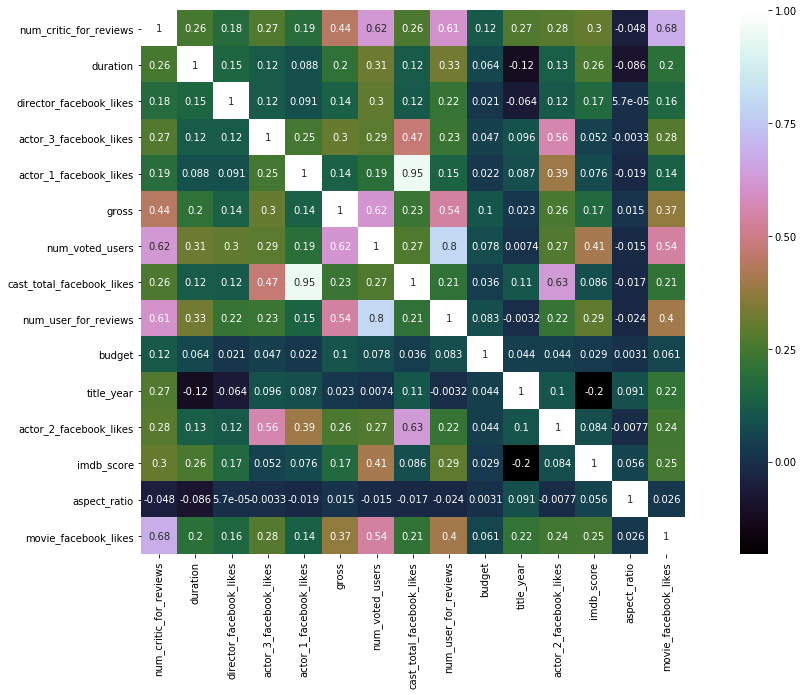

In [ ]:
#Correlation
import matplotlib.pyplot as plt
import seaborn as sns
corr_mat=movies.corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')

In [ ]:
#visualization
movies[movies['imdb_score']>7.5].shape[0]

747

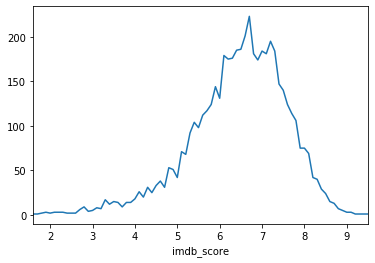

In [ ]:
#747 out of 5043 movies are having more than 7.5 imdb rating.
#Genrally people watch this king of rating movies
data_groupby_ratings = movies.groupby(['imdb_score'])['movie_title'].count()
data_groupby_ratings.plot()
#we can see more than 200  movies have rating of around 6.5

In [ ]:
name_counts = movies['director_name'].value_counts()
movies['film_count'] = movies['director_name'].map(name_counts) # match the film count to the director
print(name_counts)

Steven Spielberg        27
Woody Allen             22
Clint Eastwood          20
Martin Scorsese         20
Ridley Scott            18
Spike Lee               17
Steven Soderbergh       16
Tim Burton              16
John Carpenter          15
Renny Harlin            15
Joel Schumacher         14
Sam Raimi               14
Oliver Stone            14
Barry Levinson          13
Ron Howard              13
Robert Rodriguez        13
Michael Bay             13
Robert Zemeckis         13
Stephen Frears          12
Kevin Smith             12
Tony Scott              12
Shawn Levy              12
Richard Donner          12
Brian De Palma          12
Peter Jackson           12
Wes Craven              12
Rob Reiner              11
Rob Cohen               11
Chris Columbus          11
Bobby Farrelly          11
                        ..
James Kerwin             1
Claudia Sainte-Luce      1
Deb Hagan                1
Nanette Burstein         1
Cheryl Dunye             1
Kevin Jordan             1
M

In [ ]:
#subset with directors having more than 5 movies
dir_subset = movies[movies['film_count'] > 5]

KeyError: ignored

In [ ]:
#arranging that subset based on avg imdb_score of there movies
top10pro = dir_subset.sort_values(ascending = False, by = 'imdb_score')[['director_name','imdb_score']].head(10)
top10pro.head(3)

NameError: ignored

In [ ]:
index = np.arange(len(top10pro['director_name']))
plt.bar(index,top10pro['imdb_score'])
plt.xlabel('Director', fontsize=10)
plt.ylabel('imdb score', fontsize=10)
plt.xticks(index,top10pro['director_name'] , fontsize=8, rotation=30)
plt.title('Average imbd_score for Directors who have directed more than 5 movies')
plt.show()
# As we can see most of them have high score, so we can say experience of director help in success of a movie

NameError: ignored

In [ ]:
movies["profit"]=movies["budget"]-movies["gross"]
movies["profit"].corr(movies["budget"])

0.9506547433626985

In [ ]:
import bokeh.palettes
from bokeh.models import NumeralTickFormatter
from bokeh.plotting import figure, output_file, show
from bokeh.models import (
    ColumnDataSource,
    HoverTool,
    LinearColorMapper,
    BasicTicker, LogTicker, ContinuousTicker, AdaptiveTicker,
    PrintfTickFormatter,
    ColorBar,
    FactorRange
)
genres = ["Drama","Comedy","Action","Adventure","Crime","Science", "Fiction","Family"]
grouped_data = movies[movies["genres"].isin(genres)].groupby(["genres","title_year"]).profit.mean().reset_index()
dict_group_data = {"xs":[grouped_data.loc[(grouped_data["genres"]==name),"title_year"].values \
                         for name in grouped_data['genres'].unique()],
                  "ys": [grouped_data.loc[(grouped_data["genres"]==name),"profit"].values\
                         for name in grouped_data['genres'].unique()],
                  "labels": grouped_data["genres"].unique(),
                  "color": bokeh.palettes.Category10[9]}

source = ColumnDataSource(dict_group_data)

hover = HoverTool(tooltips=[
    ("Genre", "@labels"),
])

p = figure(x_axis_label = 'Year', 
           y_axis_label = 'Profit', 
           width = 1000,
           tools=[hover, "save","pan","box_zoom","reset","wheel_zoom"]) 
p.yaxis[0].formatter = NumeralTickFormatter(format="$,")

p.multi_line(xs= "xs", ys= "ys", line_color= "color", source = source, legend = "labels",line_width=3)
p.legend.location = "top_left"

p.title.text = "Profit for each Genre across years"
p.title.align = "center"
p.title.text_font_size = "20px"

show(p)

In [ ]:
min(movies.budget.values)

218.0

In [ ]:
min(movies[movies.budget>10000].budget.values)

13000.0

In [ ]:
movies['popularity']=movies['actor_1_facebook_likes']+movies['actor_2_facebook_likes']+movies["actor_3_facebook_likes"]

In [ ]:

layout = go.Layout(
    title='Profit vs. Popularity',
    yaxis=dict(
        title='Profit',
        gridcolor='rgb(255, 255, 255)',
        range=[0, 6e8],
        zerolinewidth=3,
        ticklen=5,
        gridwidth=1,
    ),
    xaxis=dict(
        title='Popularity',
        gridcolor='rgb(255, 255, 255)',
        range=[0, 1200],
        zerolinewidth=3,
        ticklen=5,
        gridwidth=1,
    )
)
data = [go.Scatter(
    x=movies[movies.budget>5000].actor_1_facebook_likes.values, # Budget
    y=movies[movies.budget>5000].gross.values,  # Gross
    mode='markers',
    text= movies[movies.budget>5000].movie_title.values, # Movie Titles
    marker=dict(
        size=3*(movies[movies.budget>5000].imdb_score),
        sizeref=1.0,
        color=movies[movies.budget>5000].imdb_score.values,
                
        colorbar=ColorBar(title='Average Rating<br> &nbsp;' , tickvals=[0,1.5,3,5,7,8.5]),

        showscale=True,
        colorscale='Viridis'
    ))]
fig = go.Figure(data=data, layout=layout)
iplot(fig)
#profit increases with popularity of actors. imbd_score independent of actors popularity

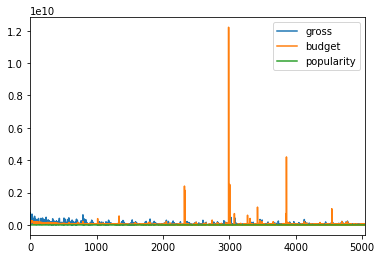

In [ ]:
data1 = movies.loc[:, ['gross','budget','popularity']]
data1.plot()
plt.show()

In [ ]:
movies.columns

Index(['director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'plot_keywords', 'num_user_for_reviews', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes', 'film_count',
       'profit', 'popularity'],
      dtype='object')

In [ ]:
#categorical columns
col=['director_name','actor_2_name','genres','movie_title','actor_3_name','plot_keywords','country','actor_1_name','content_rating']
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
#Converting categorical data to numerical data using a for loop
for i in col:
    le.fit(movies[i].unique())
    movies[i]=le.transform(movies[i])

In [ ]:
movies.head(2)

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,film_count,profit,popularity
0,922,723.0,178.0,0.0,855.0,1405,1000.0,760505847.0,106,264,...,7,237000000.0,2009.0,936.0,7.9,1.78,33000,7,-523505847.0,2791.0
1,794,302.0,169.0,563.0,1000.0,2216,40000.0,309404152.0,100,976,...,7,300000000.0,2007.0,5000.0,7.1,2.35,0,7,-9404152.0,46000.0


In [ ]:
movies=(movies-movies.mean())/movies.std() #Standardization of data

In [ ]:
movies.mean()

director_name                2.603014e-17
num_critic_for_reviews      -1.718809e-15
duration                     8.155945e-16
director_facebook_likes      9.509931e-16
actor_3_facebook_likes       4.976520e-17
actor_2_name                 7.881417e-17
actor_1_facebook_likes      -5.814966e-16
gross                        3.714032e-14
genres                       1.171205e-17
actor_1_name                -1.232352e-16
movie_title                 -9.739244e-17
num_voted_users              6.969990e-17
cast_total_facebook_likes    9.125272e-17
actor_3_name                 1.122538e-16
plot_keywords                1.008733e-16
num_user_for_reviews        -7.825718e-16
country                      2.984261e-15
content_rating               1.706943e-15
budget                      -5.718480e-15
title_year                   2.452946e-13
actor_2_facebook_likes       9.873786e-17
imdb_score                   4.585834e-15
aspect_ratio                -1.410118e-13
movie_facebook_likes         3.903

In [ ]:
movies.std()

director_name                1.0
num_critic_for_reviews       1.0
duration                     1.0
director_facebook_likes      1.0
actor_3_facebook_likes       1.0
actor_2_name                 1.0
actor_1_facebook_likes       1.0
gross                        1.0
genres                       1.0
actor_1_name                 1.0
movie_title                  1.0
num_voted_users              1.0
cast_total_facebook_likes    1.0
actor_3_name                 1.0
plot_keywords                1.0
num_user_for_reviews         1.0
country                      1.0
content_rating               1.0
budget                       1.0
title_year                   1.0
actor_2_facebook_likes       1.0
imdb_score                   1.0
aspect_ratio                 1.0
movie_facebook_likes         1.0
film_count                   1.0
profit                       1.0
popularity                   1.0
dtype: float64

In [ ]:
movies=(movies-movies.min())/(movies.max()-movies.min()) #Normalization of data

In [ ]:
movies.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,film_count,profit,popularity
0,0.384647,0.889163,0.339286,0.000000,0.037174,0.463543,0.001563,1.000000,0.116101,0.125954,...,0.411765,0.019402,0.930000,0.006832,0.797468,0.040486,0.094556,0.230769,0.000000,0.004261
1,0.331247,0.370690,0.321429,0.024478,0.043478,0.731112,0.062500,0.406840,0.109529,0.465649,...,0.411765,0.024559,0.910000,0.036496,0.696203,0.078947,0.000000,0.230769,0.040363,0.070229
2,0.843137,0.740148,0.279762,0.000000,0.007000,0.820521,0.017188,0.263080,0.139102,0.166508,...,0.411765,0.020056,0.990000,0.002869,0.658228,0.078947,0.243553,0.269231,0.044629,0.017640
3,0.155611,1.000000,0.311508,0.956522,1.000000,0.175520,0.042188,0.589253,0.314348,0.936546,...,0.411765,0.020466,0.960000,0.167883,0.873418,0.078947,0.469914,0.269231,0.025546,0.111450
4,0.250313,0.171422,0.198812,0.005696,0.028044,0.802046,0.000205,0.063732,0.824754,0.249046,...,0.411765,0.003254,0.864705,0.000088,0.696203,0.070203,0.000000,0.000000,0.040418,0.001203


In [ ]:
#hypothesis test
from scipy.stats import ttest_1samp
#for testing average imdb score is 7 or not
imdb_mean=movies['imdb_score'].mean()
print(imdb_mean)


0.6129288122149531


In [ ]:
tset, pval = ttest_1samp(movies['imdb_score'], 0.07)
print(pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
   print(" we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")

0.0
 we are rejecting null hypothesis
